In [1]:
import re
import string
import scipy
import pickle
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from joblib import dump, load
from astropy.table import Table, Column

In [3]:
train_dataset = pd.read_csv('/content/Text_Classification_Train.csv')
test_dataset = pd.read_csv('/content/Text_Classification_test.csv')

In [4]:
# naming the first column as "index" column
train_dataset.index.names = ['index']
train_dataset.columns.name = train_dataset.index.name
train_dataset.index.name = None
print("Train Dataset:")
print("==============\n")
print(train_dataset)

Train Dataset:

index  index             comment_text  gender
0          0   r u cmng or u not cmng    male
1          1               r you cmng  female
2          2      I am fine, r u fine    male
3          3             m fn and you  female
4          4  my frnd is gr8, wll dn.    male
5          5  my best friend is great  female
6          6       we r nt going tday    male
7          7    we r not going today.  female
8          8          I have a fever.    male
9          9      im not feeling well  female


In [5]:
# viewing the attributes in train dataset
print("\n\n\nTrain Dataset Columns:")
print("==================================\n")
print(train_dataset.columns)
# checking for the total instances in train dataset
print("\n\n\nNumber of instances in Train Dataset:")
print("====================================")
print("Train Data instances: ",train_dataset.shape[0])




Train Dataset Columns:

Index(['index', 'comment_text', 'gender'], dtype='object', name='index')



Number of instances in Train Dataset:
Train Data instances:  10


In [6]:
# naming the first column as "index" column
test_dataset.index.names = ['index']
test_dataset.columns.name = test_dataset.index.name
test_dataset.index.name = None
print("Test Dataset:")
print("==============\n")
print(test_dataset)

Test Dataset:

index  index                        comment_text  gender
0          0  plz go out, plz out with with frnd    male
1          1             r u going to walk, r u?  female
2          2                            r u fine    male
3          3                        are you fine  female
4          4              he is not feeling well  female


In [7]:
# viewing the attributes in test dataset
print("\n\n\nTest Dataset Columns:")
print("=================================\n")
print(test_dataset.columns)
# checking for the total instances in test dataset
print("\n\n\nNumber of instances in Test Dataset:")
print("===================================")
print("Test instances: ",test_dataset.shape[0])




Test Dataset Columns:

Index(['index', 'comment_text', 'gender'], dtype='object', name='index')



Number of instances in Test Dataset:
Test instances:  5


In [8]:
# getting the instances whose labels are 'male’
train_Male = train_dataset[train_dataset['gender'] == 'male']
# printing instances whose labels are 'male'
print("Comments by 'Male' in Train Dataset:")
print("========================================\n")
print(train_Male)

Comments by 'Male' in Train Dataset:

index  index             comment_text gender
0          0   r u cmng or u not cmng   male
2          2      I am fine, r u fine   male
4          4  my frnd is gr8, wll dn.   male
6          6       we r nt going tday   male
8          8          I have a fever.   male


In [9]:
# getting the instances whose labels are 'female’
train_Female = train_dataset[train_dataset['gender'] == 'female']
#printing instances whose labels are 'female'
print("\n\n\nComments by 'Female' in Train Dataset:")
print("======================================\n")
print(train_Female)




Comments by 'Female' in Train Dataset:

index  index             comment_text  gender
1          1               r you cmng  female
3          3             m fn and you  female
5          5  my best friend is great  female
7          7    we r not going today.  female
9          9      im not feeling well  female


In [10]:
# getting the instances whose labels are 'male’
test_Male = test_dataset[test_dataset['gender'] == 'male']
# printing instances whose labels are 'male'
print("\n\nComments by 'Male' in Test Dataset:")
print("========================================\n")
print(test_Male)



Comments by 'Male' in Test Dataset:

index  index                        comment_text gender
0          0  plz go out, plz out with with frnd   male
2          2                            r u fine   male


In [11]:
# getting the instances whose labels are 'female’
test_Female = test_dataset[test_dataset['gender'] == 'female']
# printing instances whose labels are 'female'
print("\n\n\nComments by 'Female' in Test Dataset:")
print("===========================================\n")
print(test_Female)




Comments by 'Female' in Test Dataset:

index  index             comment_text  gender
1          1  r u going to walk, r u?  female
3          3             are you fine  female
4          4   he is not feeling well  female


In [12]:
# getting words used by male from train dataset
train_Male_Words = pd.Series(' '.join(train_Male['comment_text'].astype(str)).lower().split(" ")).value_counts()
# printing words and their count used by 'male'
print("\n\nWords used by 'Male' in train data:")
print("========================================\n")
print("Words    Count\n")
print(train_Male_Words)



Words used by 'Male' in train data:

Words    Count

r         3
u         3
cmng      2
i         2
or        1
not       1
am        1
fine,     1
fine      1
my        1
frnd      1
is        1
gr8,      1
wll       1
dn.       1
we        1
nt        1
going     1
tday      1
have      1
a         1
fever.    1
Name: count, dtype: int64


In [13]:
# getting words used by female from train dataset
train_Female_Words = pd.Series(' '.join(train_Female['comment_text'].astype(str)).lower().split(" ")).value_counts()
# printing words and their count used by 'female'
print("\n\n\nWords used by 'Female' in train data:")
print("========================================\n")
print("Words    Count\n")
print(train_Female_Words)
# get words used by male from test dataset
test_Male_Words = pd.Series(' '.join(test_Male['comment_text'].astype(str)).lower().split(" ")).value_counts()




Words used by 'Female' in train data:

Words    Count

r          2
you        2
not        2
cmng       1
fn         1
m          1
my         1
best       1
friend     1
and        1
is         1
great      1
we         1
going      1
today.     1
im         1
feeling    1
well       1
Name: count, dtype: int64


In [14]:
# printing words used by 'male' and their counts
print("\n\nWords used by 'Male' in test data:")
print("===========================================\n")
print("Words Count\n")
print(test_Male_Words)
# getting words used by female from test dataset
test_Female_Words = pd.Series(' '.join(test_Female['comment_text'].astype(str)).lower().split(" ")).value_counts()
# printing words used by 'female' and their counts
print("\n\nWords used by 'Female' in test data:")
print("===========================================\n")
print("Words    Count\n")
print(test_Female_Words)



Words used by 'Male' in test data:

Words Count

plz     2
with    2
go      1
out,    1
out     1
frnd    1
r       1
u       1
fine    1
Name: count, dtype: int64


Words used by 'Female' in test data:

Words    Count

r          2
u          1
going      1
to         1
walk,      1
u?         1
are        1
you        1
fine       1
he         1
is         1
not        1
feeling    1
well       1
Name: count, dtype: int64


Bar graph of words used by a female in train data:



<Axes: >

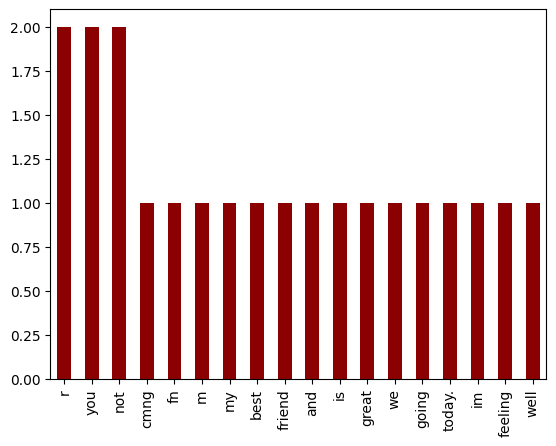

In [15]:
print("Bar graph of words used by a female in train data:")
print("====================================\n")
train_Female_Words.plot(kind='bar', color='darkred')

Bar graph of words used by a male in train data:


<Axes: >

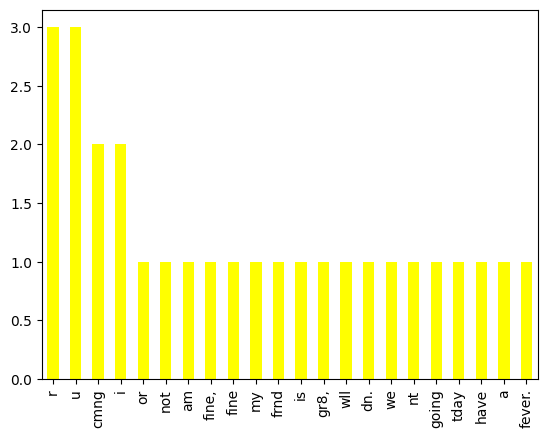

In [16]:
print("Bar graph of words used by a male in train data:")
train_Male_Words.plot(kind='bar', color='yellow')

Bar graph of words used by a female in test data:


<Axes: >

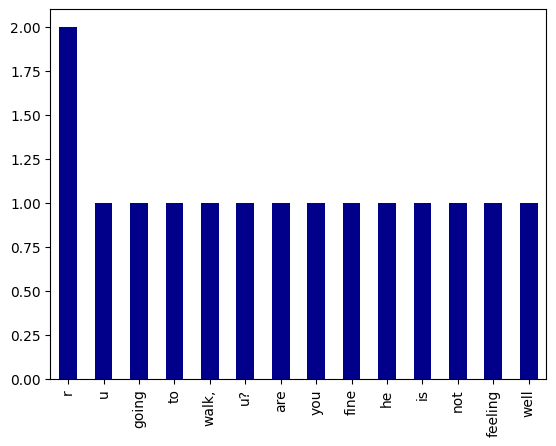

In [17]:
print("Bar graph of words used by a female in test data:")
test_Female_Words.plot(kind='bar', color='darkblue')

Bar graph of words used by a male in test data:


<Axes: >

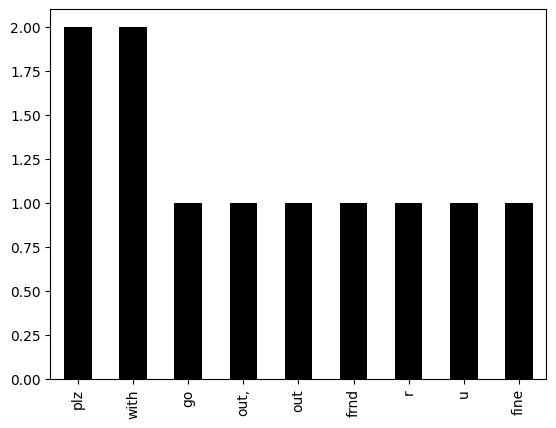

In [18]:
print("Bar graph of words used by a male in test data:")
test_Male_Words.plot(kind='bar', color='black')

In [19]:
print("Train dataset before pre-processing:\n")
print("================================\n",train_dataset)
print("\n\n\nTest dataset before pre-processing:\n")
print("=================================\n",test_dataset)
# Replace all NaN elements with 0's.
train_dataset = train_dataset.fillna(' ')
test_dataset = test_dataset.fillna(' ')
def remove_punctuation(comment):
   # Removing non ASCII chars
   comment = re.sub(r'[^\x00-\x7f]',r' ',comment)
   # Removing (replacing with empty spaces actually) all the punctuations and returning it
   comment = re.sub("["+string.punctuation+"]", " ", comment)
   return comment

Train dataset before pre-processing:

 index  index             comment_text  gender
0          0   r u cmng or u not cmng    male
1          1               r you cmng  female
2          2      I am fine, r u fine    male
3          3             m fn and you  female
4          4  my frnd is gr8, wll dn.    male
5          5  my best friend is great  female
6          6       we r nt going tday    male
7          7    we r not going today.  female
8          8          I have a fever.    male
9          9      im not feeling well  female



Test dataset before pre-processing:

 index  index                        comment_text  gender
0          0  plz go out, plz out with with frnd    male
1          1             r u going to walk, r u?  female
2          2                            r u fine    male
3          3                        are you fine  female
4          4              he is not feeling well  female


In [21]:

def normalize_text(comment):
    # Removing the extra spaces at the end
    comment = comment.strip()
    # Lowercase to avoid difference between 'hate', 'HaTe'
    comment = comment.lower()
    # Removing the escape sequences
    comment = re.sub('[\s0-9]',' ', comment)
    return comment
train_dataset['comment_text'] = train_dataset['comment_text'].map(remove_punctuation)
train_dataset['comment_text'] = train_dataset['comment_text'].map(normalize_text)
train_dataset['comment_text'].map(normalize_text)

,comment_text
0,r u cmng or u not cmng
1,r you cmng
2,i am fine r u fine
3,m fn and you
4,my frnd is gr wll dn
5,my best friend is great
6,we r nt going tday
7,we r not going today
8,i have a fever
9,im not feeling well


In [23]:
test_dataset['comment_text'] = test_dataset['comment_text'].map(remove_punctuation)
test_dataset['comment_text'] = test_dataset['comment_text'].map(normalize_text)
print("\n\n\nTrain dataset after preprocessing:\n\n")
print("========================\n",train_dataset)
print("\n\n\nTest dataset after pre-processing:\n")
print("==========================\n",test_dataset)
test_dataset['comment_text'].map(normalize_text)





Train dataset after preprocessing:


 index  index             comment_text  gender
0          0   r u cmng or u not cmng    male
1          1               r you cmng  female
2          2      i am fine  r u fine    male
3          3             m fn and you  female
4          4   my frnd is gr   wll dn    male
5          5  my best friend is great  female
6          6       we r nt going tday    male
7          7     we r not going today  female
8          8           i have a fever    male
9          9      im not feeling well  female



Test dataset after pre-processing:

 index  index                        comment_text  gender
0          0  plz go out  plz out with with frnd    male
1          1              r u going to walk  r u  female
2          2                            r u fine    male
3          3                        are you fine  female
4          4              he is not feeling well  female


,comment_text
0,plz go out plz out with with frnd
1,r u going to walk r u
2,r u fine
3,are you fine
4,he is not feeling well


In [25]:
labelEncoder = LabelEncoder()
 # fitting the label encoder on Train : gender column
train_dataset["encoded_gender"] = labelEncoder.fit_transform(train_dataset["gender"] )
print("Train Dataset Labels Encoding:\n")
print("==============================\n",train_dataset)
# fitting the label encoder on Test : gender column
test_dataset["encoded_gender"] = labelEncoder.transform(test_dataset["gender"] )
print("\n\n\nTest Dataset Labels Encoding:\n")
print("===============================\n",test_dataset)

Train Dataset Labels Encoding:

 index  index             comment_text  gender  encoded_gender
0          0   r u cmng or u not cmng    male               1
1          1               r you cmng  female               0
2          2      i am fine  r u fine    male               1
3          3             m fn and you  female               0
4          4   my frnd is gr   wll dn    male               1
5          5  my best friend is great  female               0
6          6       we r nt going tday    male               1
7          7     we r not going today  female               0
8          8           i have a fever    male               1
9          9      im not feeling well  female               0



Test Dataset Labels Encoding:

 index  index                        comment_text  gender  encoded_gender
0          0  plz go out  plz out with with frnd    male               1
1          1              r u going to walk  r u  female               0
2          2                   

In [27]:
vector = CountVectorizer(
         strip_accents='unicode',
         analyzer='word',
         token_pattern=r'\w{1,}',
         stop_words='english',
         ngram_range=(1, 1),
         max_features=10)
 #concatenate train and test data
allData = [train_dataset, test_dataset]
allData = pd.concat(allData)
# fit_transform vector on all Dataset (comments column)
all_data_features = vector.fit_transform(allData["comment_text"])

In [32]:
# Getting feature names
all_data_feature_names = vector.get_feature_names_out()
#print feature names
print("Feature Name (Bag of words) : \n", all_data_feature_names)


Feature Name (Bag of words) : 
 ['cmng' 'feeling' 'fine' 'fn' 'friend' 'frnd' 'going' 'plz' 'r' 'u']


In [34]:
 # transform vector on train Dataset (text comments)
train_features = vector.transform(train_dataset["comment_text"])
# Getting feature names
train_feature_names = vector.get_feature_names_out()
# sparse matrix
train_data = pd.DataFrame(train_features.toarray(),
columns=train_feature_names)
 # Assign Gender Column
train_data = train_data.assign(gender =
train_dataset["encoded_gender"])
 # label index
train_data.index.names = ['index']
train_data.columns.name = train_data.index.name
train_data.index.name = None

In [35]:
#print feature names
print("Feature Name (Bag of words) : \n", train_feature_names)
#print Vocabulary
print("\nVocabulary: \n" ,vector.vocabulary_)
# Print dataframe
print("\ntrain data after feature extraction:")
print("=====================================")
from IPython.display import display, HTML
display(HTML(train_data.to_html()))

Feature Name (Bag of words) : 
 ['cmng' 'feeling' 'fine' 'fn' 'friend' 'frnd' 'going' 'plz' 'r' 'u']

Vocabulary: 
 {'r': np.int64(8), 'u': np.int64(9), 'cmng': np.int64(0), 'fine': np.int64(2), 'fn': np.int64(3), 'frnd': np.int64(5), 'friend': np.int64(4), 'going': np.int64(6), 'feeling': np.int64(1), 'plz': np.int64(7)}

train data after feature extraction:


index,cmng,feeling,fine,fn,friend,frnd,going,plz,r,u,gender
0,2,0,0,0,0,0,0,0,1,2,1
1,1,0,0,0,0,0,0,0,1,0,0
2,0,0,2,0,0,0,0,0,1,1,1
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,1,0,1
7,0,0,0,0,0,0,1,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,1
9,0,1,0,0,0,0,0,0,0,0,0


In [37]:
# transform vector on train Dataset (text comments)
test_features = vector.transform(test_dataset["comment_text"])
 #Getting feature names
test_feature_names = vector.get_feature_names_out()
 #sparse matrix
test_data = pd.DataFrame(test_features.toarray(), columns=test_feature_names)
# Assign Gender Column
test_data = test_data.assign(gender = test_dataset["encoded_gender"])
# label index
test_data.index.names = ['index']
test_data.columns.name = test_data.index.name
test_data.index.name = None

In [38]:
 #print feature names
print("Feature Name (Bag of words) : \n", test_feature_names)
#print Vocabulary
print("\nVocabulary: \n" ,vector.vocabulary_)
# Print dataframe
print("\ntest data after feature extraction:")
print("=====================================")
from IPython.display import display, HTML
display(HTML(test_data.to_html()))

Feature Name (Bag of words) : 
 ['cmng' 'feeling' 'fine' 'fn' 'friend' 'frnd' 'going' 'plz' 'r' 'u']

Vocabulary: 
 {'r': np.int64(8), 'u': np.int64(9), 'cmng': np.int64(0), 'fine': np.int64(2), 'fn': np.int64(3), 'frnd': np.int64(5), 'friend': np.int64(4), 'going': np.int64(6), 'feeling': np.int64(1), 'plz': np.int64(7)}

test data after feature extraction:


index,cmng,feeling,fine,fn,friend,frnd,going,plz,r,u,gender
0,0,0,0,0,0,1,0,2,0,0,1
1,0,0,0,0,0,0,1,0,2,2,0
2,0,0,1,0,0,0,0,0,1,1,1
3,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0


In [39]:
 # Input features and target values of Train_Data
train_target = train_data.gender
print("train_features")
print("====================\n\n",train_features)
print("\ntrain_target")
print("========================\n",train_target)
# Input features and target values of test_Data
test_target = test_data.gender
print("\ntest_features")
print("=====================\n\n",test_features)
print("\ntest_target")
print("=======================\n\n",test_target)

train_features

 <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 16 stored elements and shape (10, 10)>
  Coords	Values
  (0, 0)	2
  (0, 8)	1
  (0, 9)	2
  (1, 0)	1
  (1, 8)	1
  (2, 2)	2
  (2, 8)	1
  (2, 9)	1
  (3, 3)	1
  (4, 5)	1
  (5, 4)	1
  (6, 6)	1
  (6, 8)	1
  (7, 6)	1
  (7, 8)	1
  (9, 1)	1

train_target
 0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    0
Name: gender, dtype: int64

test_features

 <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 10 stored elements and shape (5, 10)>
  Coords	Values
  (0, 5)	1
  (0, 7)	2
  (1, 6)	1
  (1, 8)	2
  (1, 9)	2
  (2, 2)	1
  (2, 8)	1
  (2, 9)	1
  (3, 2)	1
  (4, 1)	1

test_target

 0    1
1    0
2    1
3    0
4    0
Name: gender, dtype: int64


In [40]:
model_names = []
# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression = logistic_regression.fit(train_features, train_target);
print("Parameters and their values:")
print("===========================\n\n", logistic_regression)
model_names.append('Logistic Regression')

Parameters and their values:

 LogisticRegression()


In [41]:
random_forest_classifier = RandomForestClassifier()
random_forest = random_forest_classifier.fit(train_features, train_target);
print("Parameters and their values:")
print("===========================\n\n", random_forest)
model_names.append('Random Forest')

Parameters and their values:

 RandomForestClassifier()


In [42]:
linear_svc = LinearSVC()
linear_svc=linear_svc.fit(train_features, train_target);
print("Parameters and their values:")
print("===========================\n\n", linear_svc)
model_names.append('Linear SVC')

Parameters and their values:

 LinearSVC()


In [43]:
bernoulli_nb = BernoulliNB()
bernoulli_nb = bernoulli_nb.fit(train_features, train_target);
print("Parameters and their values:")
print("===========================\n\n",bernoulli_nb )
model_names.append('Bernoulli NB')

Parameters and their values:

 BernoulliNB()


In [44]:
scores = []
# Evaluating Logistic Regression
# Using the predict method on the test data
predictions = logistic_regression.predict(test_features)
# accuracy score
logistic_regression_prediction= accuracy_score(test_target, predictions)
print("Accuracy Score: ",logistic_regression_prediction)
scores.append(logistic_regression_prediction)

Accuracy Score:  0.6


In [45]:
#Random Forest Classifier
# Using the predict method on the test data
predictions = random_forest.predict(test_features)
# accuracy score
random_forest_prediction= accuracy_score(test_target, predictions)
print("Accuracy Score: ",random_forest_prediction)
scores.append(random_forest_prediction)

Accuracy Score:  0.6


In [46]:
# Using the predict method on the test data
predictions = linear_svc.predict(test_features)
# accuracy score
linear_svc_prediction= accuracy_score(test_target, predictions)
print("Accuracy Score: ",linear_svc_prediction)
scores.append(linear_svc_prediction)

Accuracy Score:  0.6


In [49]:
# Using the predict method on the test data
predictions = bernoulli_nb.predict(test_features)
# accuracy score
bernoulli_nb_prediction= accuracy_score(test_target, predictions)
print("Accuracy Score: ",bernoulli_nb_prediction)
scores.append(bernoulli_nb_prediction)

Accuracy Score:  0.6


In [50]:
x = PrettyTable()
print('\n\nDetailed Performance of all the models.')
print("=======================================\n")
x.field_names = ['Model', 'Accuracy']
for i in range(0,4):
    x.add_row([model_names[i],scores[i]])
print(x)



Detailed Performance of all the models.

+---------------------+----------+
|        Model        | Accuracy |
+---------------------+----------+
| Logistic Regression |   0.6    |
|    Random Forest    |   0.6    |
|      Linear SVC     |   0.6    |
|     Bernoulli NB    |   0.6    |
+---------------------+----------+


In [52]:
 # Best model selection
y = PrettyTable()
print("\n\nBest Model.")
print("========================================")
y.field_names = ["Models", "Accuracy"]
j = 0
for i in range(0,4):
  score1 = scores[i-1]
  score2 = scores[j]
  if(score1 >= score2):
     index = i
  else:
     index = j
y.add_row([model_names[index],scores[index]])
print(y)



Best Model.
+--------------+----------+
|    Models    | Accuracy |
+--------------+----------+
| Bernoulli NB |   0.6    |
+--------------+----------+


In [53]:
#concatenate train and test features
all_data = [train_data, test_data]
all_data = pd.concat(all_data)
 # Separate input features and target values
 # target are the values we want to predict, in this case is 'gender'
target_values = np.array(all_data["gender"])
all_features = all_data.drop('gender', axis = 1)

In [54]:
classifier = logistic_regression.fit(all_features,
              target_values )

In [55]:
pickle.dump(classifier, open('classifier.pkl', 'wb'))
dump(vector, 'vectorizer.joblib')
print()

In [56]:
best_classifier = pickle.load(open('classifier.pkl', 'rb'))
vector = load('vectorizer.joblib')

In [57]:
user_input = input("Please enter your comment here: ").strip()

Please enter your comment here: this is good and exilent 


In [60]:
 # convert into 1d array
data = [user_input]
# transforming it to get sparse matrix
transformed_input = vector.transform(data)
print("Vector features: ")
print("=============\n", vector.get_feature_names_out())
user_input_features = pd.DataFrame(transformed_input.toarray(),
                                   columns=vector.get_feature_names_out())
print("\nUser input features with weights\n")
print("======================\n",user_input_features)

Vector features: 
 ['cmng' 'feeling' 'fine' 'fn' 'friend' 'frnd' 'going' 'plz' 'r' 'u']

User input features with weights

    cmng  feeling  fine  fn  friend  frnd  going  plz  r  u
0     0        0     0   0       0     0      0    0  0  0


In [61]:
prediction = best_classifier.predict(transformed_input)
t = PrettyTable([" **      Prediction   **"])
if(prediction == 1):
 t.add_row(['Male'])
if(prediction == 0):
 t.add_row(['Female'])

print(t)

+--------------------------+
|  **      Prediction   ** |
+--------------------------+
|          Female          |
+--------------------------+


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
